In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
relationship_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Connection Matrix.csv', index_col=0)
constraint_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Seating Constraints.csv', index_col=0)
guest_list_df = pd.read_csv('../data/raw/Wedding Guest Network Data - Guest List.csv', index_col=0)

In [3]:
relationship_mtx

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault,Ryan Hurley,Michael Baldea,Guest Baldea
Richard Pattison,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0
Kathryn Russell,3.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0
Tim Balzer,3.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0
Mac Pattison,3.0,0.0,0.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
Ali Pattison,3.0,0.0,0.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morgan Pattison,2.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,0.0
MC Davault,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
Ryan Hurley,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
Michael Baldea,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0


In [4]:
constraint_mtx.fillna(0, inplace=True)

In [5]:
all(constraint_mtx.columns == relationship_mtx.columns) and all(constraint_mtx.index == relationship_mtx.index) and all(constraint_mtx.index == constraint_mtx.columns)

True

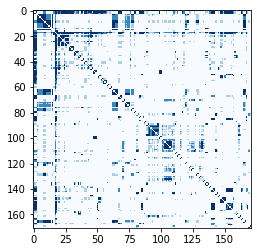

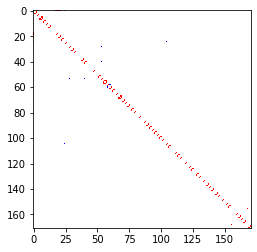

In [6]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.values, cmap='bwr', interpolation='nearest')
plt.show()

In [7]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[:50]

Mary Balzer            355.0
Richard Pattison       283.0
Max Balzer             227.0
Kathryn Russell        222.0
Tim Balzer             210.0
Holly Pattison         129.0
Wally Pattison         123.0
Genevieve Geoghan      103.0
Mac Pattison            92.0
Mary Grace Pattison     84.0
Maggie Dunn             79.0
Pat Jr. Pattison        76.0
Oscar Nordness          73.0
Marie Pattison          73.0
Pat Pattison            73.0
Molly Bammerlin         68.0
Ali Pattison            68.0
Tim Campen              67.0
Suzie Campen            67.0
James Rogers            66.0
Judy Bell               66.0
Christie Ranges         65.0
Daryl Bammerlin         64.0
Morgan Pattison         64.0
Ella Pattison           62.0
Harper Bammerlin        62.0
Mary Pattison           62.0
Olivia Bammerlin        62.0
William Pattison        62.0
Bonnie Neel             62.0
Murd Neel               62.0
Cody Vild               61.0
Sloane Fowkes           60.0
Andrew Campen           57.0
Angelo Morales

In [8]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[-50:]

Jake Bottiglieri        26.0
Troy Nguyen             26.0
Ellen Ahlgren           26.0
Andres Cifuentes        26.0
Kaitlin Olson           25.0
Erik Ahlgren            25.0
Sam Waring              24.0
Claire Meunier          24.0
Johan Ahlgren           24.0
Maggie McGinley         24.0
Anneli Ahlgren          24.0
Hamideh Soltanzadeh     23.0
Molly Hamrick           23.0
Cara Touretzky          23.0
Sam Nicholson           22.0
Charlie Coolidge        22.0
Daniel Cohen            21.0
Jenny Falberg           21.0
Liz Rhea                21.0
Paul Davault            21.0
Jukka Aromaa            21.0
Bob Olson               20.0
Ryan Hurley             20.0
Tori Iannuzzi           20.0
Kendra Ruth             19.0
John Mazza              19.0
Aaron Hoogstraten       17.0
Astrid Wettstein        17.0
Megan Kesselman         17.0
Maan Sangid             16.0
Mallory Chandler        16.0
Michael Baldea          16.0
Caroline Coolidge       15.0
Leila Thomas            14.0
Jake Sartino  

In [9]:
guest_list = relationship_mtx.index.values.tolist()

In [10]:
len(guest_list)

171

In [11]:
graph = nx.Graph(name="Wedding Guest Network")
graph.add_nodes_from(guest_list)

In [12]:
edges = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:
        w = relationship_mtx.loc[g, gp]
        if w != 0:
            edges.append((g, gp, w))

In [13]:
len(edges)

2041

In [14]:
graph.add_weighted_edges_from(edges, weight='relationship_strength')

In [15]:
between_centrality = nx.betweenness_centrality(graph, weight='relationship_strength')
clusters = nx.clustering(graph, weight='relationship_strength')
centrality = nx.eigenvector_centrality(graph, weight='relationship_strength')

In [16]:
df_analysis = pd.concat((pd.Series(between_centrality).sort_index(), pd.Series(clusters).sort_index(), pd.Series(centrality).sort_index()), axis=1, keys=['between_centrality', 'clusters', 'centrality'])
centrality_ordered = df_analysis.sort_values('centrality').index
between_centrality_ordered = df_analysis.sort_values('between_centrality').index

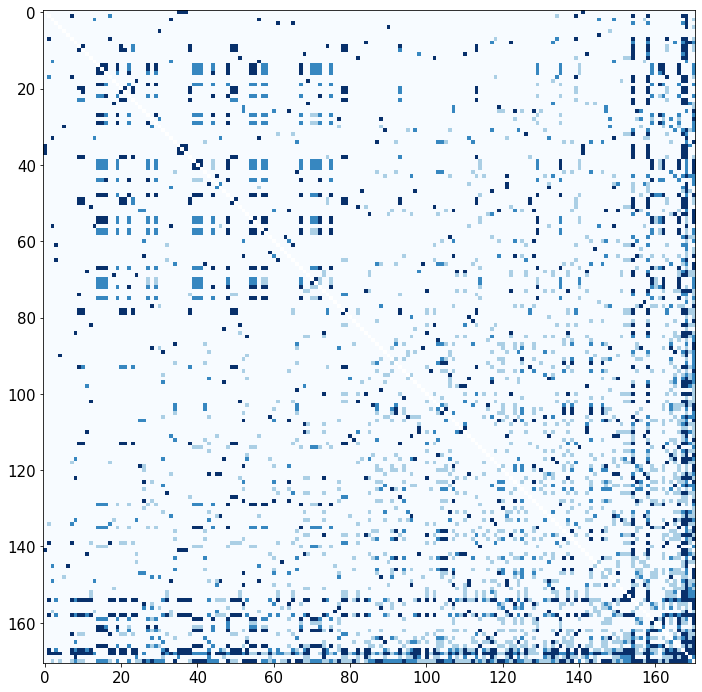

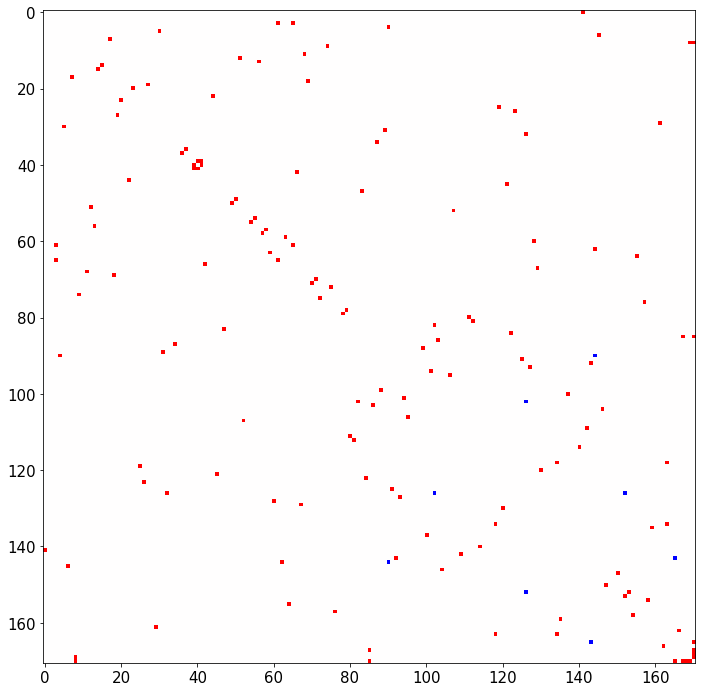

In [17]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='bwr', interpolation='nearest')
plt.show()

In [18]:
guest_list_df.index = guest_list

In [19]:
guest_list_df

,Last Name,Party,Phone,Email,age,relationship,Street Address 1,Street Address 2,City,State/Province,...,Wedding Ceremony and Reception - RSVP,Wedding Ceremony and Reception - Do you require a vegetarian dinner,Wedding Ceremony and Reception - Please let us know of any food allergies,Wedding Ceremony and Reception - Thank You Sent,Wedding Ceremony and Reception - Gift Received,Send a note to the couple?,Unnamed: 23,Unnamed: 24,Pattison Family,24
Richard Pattison,Pattison,Richard Pattison,4408212849,mary.a.balzer@gmail.com,34,Pattison Family,"1236 N Flores St,",401,W Hollywood,CA,...,Attending,NaN,NaN,Not Sent,NaN,NaN,NaN,NaN,Pattison Family Friend,4.0
Kathryn Russell,Russell,Kathryn Russell & Tim Balzer,323-829-4040,kathrynrussellbalzer@gmail.com,68,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,Can't wait!!,NaN,NaN,RRSD,1.0
Tim Balzer,Balzer,Kathryn Russell & Tim Balzer,NaN,NaN,69,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,CMU,24.0
Mac Pattison,Pattison,Pattison Family,4124002585,Mac.Pattison@gmail.com,36,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,Can‚Äôt wait!!,NaN,NaN,UT,7.0
Ali Pattison,Pattison,Pattison Family,NaN,NaN,40,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,Richard Professional,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morgan Pattison,Pattison,NaN,NaN,NaN,46,Pattison Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MC Davault,Davault,NaN,NaN,NaN,70,Balzer Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryan Hurley,Hurley,NaN,NaN,NaN,25,Balzer Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Michael Baldea,Baldea,NaN,NaN,NaN,41,Richard Professional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
guest_list_df['relationship'] = pd.Categorical(guest_list_df['relationship'])

In [21]:
guest_list_df.relationship.cat.codes

Richard Pattison     7
Kathryn Russell      0
Tim Balzer           0
Mac Pattison         7
Ali Pattison         7
                    ..
Morgan Pattison      7
MC Davault           0
Ryan Hurley          0
Michael Baldea      10
Guest Baldea        10
Length: 171, dtype: int8

In [22]:
category_map = {key: i for i, key in enumerate(guest_list_df.relationship.cat.categories)}

In [23]:
category_map = {
    'Balzer Family': 'green',
    'Balzer Family Friend': 'Dark green',
    'CMU': 'maroon',
    'IHHS': 'grey',
    'Mary Professional': 'black',
    'Other': 'purple',
    'PU': 'orange',
    'Pattison Family': 'pink',
    'Pattison Family Friend': 'dark red',
    'RRSD': 'silver',
    'Richard Professional': 'yellow',
    'UCLA': 'light blue',
    'UT': 'dark orange'
 }

In [24]:
import plotly.graph_objects as go

In [25]:
pos_spring = nx.spring_layout(graph)
# pos = nx.circular_layout(graph)
# pos = nx.shell_layout(graph)
# pos = nx.spectral_layout(graph)
pos_kamada = nx.kamada_kawai_layout(graph, )

In [26]:
x_sorted = sorted(np.asarray([p.tolist() for p in pos_spring.values()])[:, 0])
y_sorted = sorted(np.asarray([p.tolist() for p in pos_spring.values()])[:, 1])

xmin, xmax = x_sorted[3], x_sorted[-3]
ymin, ymax = x_sorted[3], x_sorted[-3]

In [27]:
for node in graph.nodes():
    pos_spring[node][0] = np.maximum(xmin, np.minimum(xmax, pos_spring[node][0]))
    pos_spring[node][1] = np.maximum(ymin, np.minimum(ymax, pos_spring[node][1]))
    

In [28]:
def dist(A, B):
    return np.linalg.norm(np.array(A)-np.array(B))
    
def get_mid_coord(A, B, f=0.02):
    x0, y0 = A
    x1, y1 = B
    r = dist(A, B)
    slope = - 1 / ((y1 - y0) / (x1 - x0))
    x_mid = (x0 + x1) / 2
    y_mid = (y0 + y1) / 2
    if f > 0:
        x_p = x_mid + np.sqrt(r * f / (1 + slope ** 2))
    else:
        x_p = x_mid - np.sqrt(-r * f / (1 + slope ** 2))
        
    y_p = y_mid + slope * (x_p - x_mid)
    return x_p, y_p

In [29]:
edge_traces = []
edge_info = []
for edge in graph.edges():
    x0, y0 = pos_spring[edge[0]]
    x1, y1 = pos_spring[edge[1]]

    weight = graph.get_edge_data(edge[0], edge[1])['relationship_strength']

    # x_p = (x0 + x1) / 2
    # y_p = (y0 + y1) / 2
    f = 0.0025 if np.random.randint(2) else -0.0025

    x_p, y_p = get_mid_coord([x0, y0], [x1, y1], f)
    
    edge_traces += [go.Scatter(
        x=[x0, x_p, x1], y=[y0, y_p, y1],
        line=dict(width=weight/5, color='black', shape='spline'),
        mode='lines')]

    edge_info += [go.Scatter(
        x=[x_p], y=[y_p],
        mode='markers',
        marker=dict( size=0.1,  color='black'),
        text=[f'{edge[0]} <--> {edge[1]} <br> Weight: {int(weight)}'],
        hoverinfo='text')]

/Users/richardpattison/anaconda3/envs/wedding_prep/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [46]:


node_traces = []
for cat, color in category_map.items():

    node_names = []
    node_x = []
    node_y = []
    for node in graph.nodes():
        if guest_list_df.loc[node, 'relationship'] != cat:
            continue

        x, y = pos_spring[node]
        node_x.append(x)
        node_y.append(y)
        node_names.append(node)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        text=[f"{n} <br> {cat}" for n in node_names],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            color=color,
            size=15,
            line_width=1))

    node_traces.append(node_trace)

In [48]:
fig = go.Figure(data=edge_traces + edge_info + node_traces,
                layout=go.Layout(
                    title="Mary and Richard's wedding guest network",
                    titlefont_size=16,
                    width=800,
                    height=800,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
fig.show()